# Problem Set 5 Solutions

## 18.330 Intro to Numerical Analysis (MIT, Spring 2019) 

Henrik Ronellenfitsch & Boya Song 

In [1]:
using PyPlot
PyPlot.svg(true)

using LinearAlgebra

### Problem 1. Getting Richardson extrapolation wrong. (20 points)
$$\begin{align}
F^\text{Richardson}(\Delta) &= \frac{t^q F(\Delta /t) - F(\Delta)}{t^q-1}\\
& = \frac{t^{q} [F(0) + Ct^{-p}\Delta^p + t^{-p-1}O(\Delta^{p+1})]- \left[F(0) + C\Delta^p +O(\Delta^{p+1})\right]}{t^q-1}\\
&= F(0) + \frac{t^{q-p} -1}{t^q-1}C\Delta^p +O(\Delta^{p+1})
\end{align}$$

We can see that when $q\neq p$, the order of the Richardson extrapolation is the same as the order of $F$.

### Problem 2. Romberg integration. (20 points)

Using $t=2$ and $\Delta = N^{-1}$, we have:
$$\begin{align}
&F^\text{Richardson}_\text{rect}(\Delta) = 2 F_\text{rect}(\Delta/2) - F_\text{rect}(\Delta)\\
&F^\text{Richardson}_\text{trap}(\Delta) = \frac{4}{3} F_\text{trap}(\Delta/2) - \frac{1}{3}F_\text{trap}(\Delta)\\
&F^\text{Richardson}_\text{simp}(\Delta) = \frac{16}{15} F_\text{simp}(\Delta/2) - \frac{1}{15}F_\text{simp}(\Delta)
\end{align}$$

In [2]:
function rect(f, x_range, N)
    x_min = float(min(x_range...));
    x_max = float(max(x_range...));
    dx = (x_max-x_min)/N;
    
    I=0.0; 
    x=x_min;
    for n=1:N
        I += f(x)*dx;
        x += dx; 
    end
    return I;
end

function Richardson_rect(f, x_range, N)
    x_min = float(min(x_range...));
    x_max = float(max(x_range...));
    dx = (x_max-x_min)/N;
    
    I=0.0; 
    x=x_min+dx/2;
    for n=1:N
        I += f(x)*dx;
        x += dx; 
    end
    return I;
end


function trap(f, x_range, N)
    x_min = float(min(x_range...));
    x_max = float(max(x_range...));
    dx = (x_max-x_min)/N;
    
    I=0.; 
    lx=x_min;   # left point of each subinterval 
    lf = f(lx); 
    for n=1:N
        rx = lx + dx; # right point of each subinterval 
        rf = f(rx); 
        I += (lf + rf)*dx/2.;
        lx = rx;
        lf = rf;
    end

    return I;
end

function Richardson_trap(f, x_range, N)
    # this is the same as Newton_Cotes_2
    x_min = float(min(x_range...));
    x_max = float(max(x_range...));
    dx = (x_max-x_min)/N;
    
    I=0.; 
    lx = x_min; # left point of each subinterval 
    lf = f(lx); 
    for n=1:N
        rx = lx + dx;  # right point of each subinterval 
        rf = f(rx); 
        mf = f(lx + dx/2); # midpoint of each subinterval 
        I += (lf + 4*mf + rf)*dx/6.;
        lx = rx;
        lf = rf;
    end
    return I;
end



function simp(f, x_range, N)
    x_min = float(min(x_range...));
    x_max = float(max(x_range...));
    dx = (x_max-x_min)/N;
    
    I=0.; 
    lx = x_min; # left point of each subinterval 
    lf = f(lx); 
    for n=1:N
        rx = lx + dx;  # right point of each subinterval 
        rf = f(rx); 
        mf = f(lx + dx/2); # midpoint of each subinterval 
        I += (lf + 4*mf + rf)*dx/6.;
        lx = rx;
        lf = rf;
    end
    return I;
end

function Richardson_simp(f, x_range, N)
    x_min = float(min(x_range...));
    x_max = float(max(x_range...));
    dx = (x_max-x_min)/N;
    
    I=0.; 
    lx = x_min; # left point of each subinterval 
    lf = f(lx); 
    for n=1:N
        rx = lx + dx;  # right point of each subinterval 
        rf = f(rx); 
        mf = f(lx + dx/2.0); # midpoint of each subinterval 
        lqf = f(lx + dx/4.0); 
        rqf = f(lx + 3.0*dx/4.0);
        I += (7.0lf/6.0 + 16lqf/3.0 + 2*mf + 16rqf/3.0 + 7rf/6.0)*dx/15.;
        lx = rx;
        lf = rf;
    end
    return I;
end


Richardson_simp (generic function with 1 method)

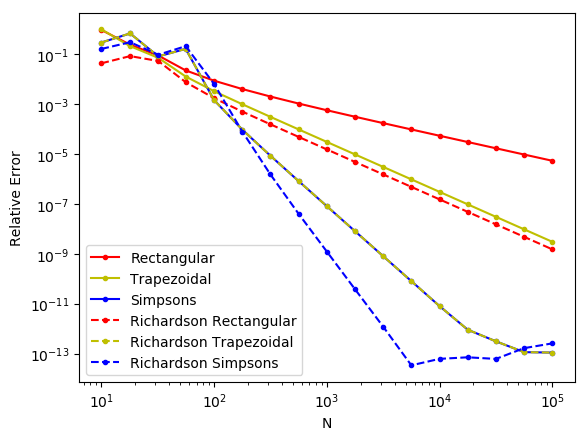

In [3]:
f(x) = sin(x^2)/sqrt(x^2+1);
I_exact = 0.47519858913634741151;
x_range = [0, 10];
N = round.(10 .^(1:0.25:5)); 

I_rect = zeros(size(N));
I_trap = zeros(size(N));
I_simp = zeros(size(N));

I_R_rect =zeros(size(N));
I_R_trap = zeros(size(N));
I_R_simp = zeros(size(N));

for i=1:length(N)
    I_rect[i] = rect(f, x_range, N[i]);
    I_trap[i] = trap(f, x_range, N[i]);
    I_simp[i] = simp(f, x_range, ceil((N[i]-1)/2));
    
    I_R_rect[i] = Richardson_rect(f, x_range, N[i]);
    I_R_trap[i] = Richardson_trap(f, x_range, ceil((N[i]-1)/2));
    I_R_simp[i] = Richardson_simp(f, x_range, ceil((N[i]-1)/4));
end
E_N_rect = abs.(I_exact .- I_rect)./I_exact;
E_N_trap = abs.(I_exact .- I_trap)./I_exact;
E_N_simp = abs.(I_exact .- I_simp)./I_exact;

E_N_R_rect = abs.(I_exact .- I_R_rect)./I_exact;
E_N_R_trap = abs.(I_exact .- I_R_trap)./I_exact;
E_N_R_simp = abs.(I_exact .- I_R_simp)./I_exact;

using PyPlot;
l1, = loglog(N, E_N_rect, marker=".", color = "r");
l2, = loglog(N, E_N_trap, marker=".", color = "y");
l3, = loglog(N, E_N_simp, marker=".", color = "b");
l4, = loglog(N, E_N_R_rect, marker=".", linestyle="--", color = "r");
l5, = loglog(N, E_N_R_trap, marker=".", linestyle="--",color = "y");
l6, = loglog(N, E_N_R_simp, marker=".", linestyle="--",color = "b");
legend([l1, l2, l3, l4, l5, l6], ["Rectangular", "Trapezoidal", "Simpsons", "Richardson Rectangular", "Richardson Trapezoidal", "Richardson Simpsons"]);
#xscale("log"), yscale("log");
xlabel("N"), ylabel("Relative Error");

### Problem 3. Steffensen’s method. (20 points)

#### (a)
$$g(x_n) = \frac{f(x_n) + f'(x_n)f(x_n) + O(f(x_n)^2) - f(x_n)}{f(x_n)} = f'(x_n) + O(f(x_n))$$
We are using 1sr order forward difference with a step size of $f(x_n)$.

#### (b)
$$\begin{align}
x_{n+1} - x^* &= x_n - x^* - \frac{f(x_n)}{g(x_n)} = x_n - x^* - \frac{f(x_n)}{ f'(x_n) +O(f(x_n))}
\end{align}$$

As $f(x_n) = f(x^*) + f'(x^*)(x_n - x^*) + O((x_n-x^*)^2) =  f'(x^*)(x_n - x^*) + O((x_n-x^*)^2) $, 
$$\begin{align}
&x_{n+1} - x^*= （x_n - x^*）\left( 1 - \frac{f'(x_n)+ O(x_n-x^*)}{ f'(x_n) +O(f(x_n))}\right) = （x_n - x^*） O(x_n - x^*) \\
&\implies \varepsilon_{n+1}= O(\varepsilon_n^2)\end{align}$$
Therefore Steffensen’s method is qudratically convergent, same as Newton's method. 

### Problem 4. Newton’s method in higher dimensions. (20 points)

In [4]:
function newton_raphson(f, f_Jacobian, x0; tol=10^(-8))
    """ Implement Newton's method for finding a
    zero of f(x) from the starting guess x0.
    """
    x = x0;
    diff = Inf; 
    while (diff>tol)
        step = f_Jacobian(x) \ f(x);
        diff = norm(step, 2)/ norm(x, 2);
        x = x .- step;
    end
    
    return x
end

newton_raphson (generic function with 1 method)

#### (a)

In [5]:
function f(x) 
    rst = zeros(2,1)
    x1 = x[1];
    x2 = x[2];
    rst[1] = 3x1^2 - x2^2;
    rst[2] = 3x1*x2^2 - x1^3 -1;
    return rst;
end

function f_J(x) 
    rst = zeros(2,2)
    x1 = x[1];
    x2 = x[2];
    rst[1, 1] = 6x1; 
    rst[1, 2] = -2x2; 
    rst[2, 1] = 3x2^2-3x1^2;
    rst[2, 2] = 6x1*x2;
    return rst;
end

f_J (generic function with 1 method)

In [6]:
x_soln = newton_raphson(f, f_J, [0.1,0.1]) # be careful when choosing x0

2×1 Array{Float64,2}:
 0.5               
 0.8660254037844386

In [7]:
f(x_soln)

2×1 Array{Float64,2}:
  1.1102230246251565e-16
 -2.220446049250313e-16 

#### (b)

In [8]:
function f(x) 
    rst = zeros(3,1)
    x1 = x[1];
    x2 = x[2];
    x3 = x[3];
    rst[1] = 6x1 - 2*cos(x2*x3) -1;
    rst[2] = 9x2 + sqrt(x1^2 + sin(x3) + 1.06) + 0.9;
    rst[3] = 60x3 + 3*exp(-x1*x2) + 10*pi -3
    return rst;
end

function f_J(x) 
    rst = zeros(3,3)
    x1 = x[1];
    x2 = x[2];
    x3 = x[3];
    rst[1, 1] = 6; 
    rst[1, 2] = 2x3*sin(x2*x3);
    rst[1, 3] = 2x2*sin(x2*x3);
    rst[2, 1] = 2x1 / sqrt(x1^2 + sin(x3) + 1.06);
    rst[2, 2] = 9;
    rst[2, 3] = cos(x3) / sqrt(x1^2 + sin(x3) + 1.06);
    rst[3, 1] = -3x2*exp(-x1*x2);
    rst[3, 2] = -3x1*exp(-x1*x2);
    rst[3, 3] = 60;
    return rst;
end

f_J (generic function with 1 method)

In [9]:
x_soln = newton_raphson(f, f_J, [0.1,0.1,0.1]) # be careful when choosing x0

3×1 Array{Float64,2}:
  0.4981446845894931 
 -0.19960589554367794
 -0.5288259775733847 

In [10]:
f(x_soln) 

3×1 Array{Float64,2}:
  4.440892098500626e-16
  9.199307982044047e-13
 -3.552713678800501e-15

### Problem 5.
#### (a)
We write
$$
f(\mathbf{x} - \alpha \nabla f) = \frac{1}{2} (\mathbf{x} - \alpha \nabla f)^\top Q
(\mathbf{x} - \alpha \nabla f) - \mathbf{b}^\top (\mathbf{x} - \alpha \nabla f).
$$
Take the derivative with respect to $\alpha$ and set it to zero,
\begin{align}
\frac{d}{d\alpha} f(\mathbf{x} - \alpha \nabla f) &= 
-\frac{1}{2}\nabla f^\top Q
(\mathbf{x} - \alpha \nabla f) - \frac{1}{2}(\mathbf{x} - \alpha \nabla f)^\top Q \nabla f + \mathbf{b}^\top\nabla f = 0 \\
\Rightarrow \alpha \nabla f^\top Q \nabla f &= \underbrace{(Q\mathbf{x} - \mathbf{b})^\top}_{=\nabla f^\top} \nabla f \\
\Rightarrow \alpha &= \frac{\nabla f^\top \nabla f}{\nabla f^\top Q \nabla f}.
\end{align}

#### (b)

In [11]:
function steepest_descent_quad(Q, b, α, x0; ϵ=1e-8, N=1000)
    """ Return the steps of a steepest descent algorithm
    for the quadratic problem
    min_x  1/2 x^T Q x = b^T x.
    
    α(∇f, Q, b) returns a stepsize.
    """
    xs = [x0]
    
    grad_f(x) = Q*x - b
    
    x = x0
    for i=1:N        
        ∇f = grad_f(x)
        
        x = x .- α(∇f, Q, b)*∇f
        
        push!(xs, x)
        
        if norm(x - xs[end-1]) <= ϵ*norm(xs[end-1])
            break
        end
    end
    
    return hcat(xs...)
end

steepest_descent_quad (generic function with 1 method)

In [12]:
Q = [4.0 -2.0
    -2.0 3.0]

b = [2.0 
    3.0]

α_optimal(∇f, Q, b) = ∇f'*∇f./(∇f'*Q*∇f)
x_k_steepest = steepest_descent_quad(Q, b, α_optimal, [-4.0, -3.0])

α_const(∇f, Q, b) = 0.1
x_k_steepest_const = steepest_descent_quad(Q, b, α_const, [-4.0, -3.0])

# value at the minimum
x_sol = x_k_steepest[:,end]
0.5*x_sol'*Q*x_sol - b'*x_sol

-4.5

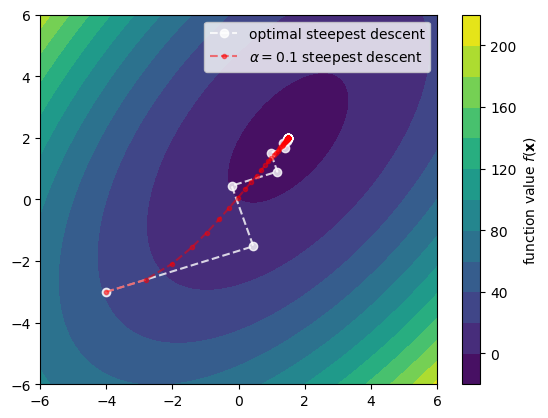

PyObject <matplotlib.legend.Legend object at 0x13fb01da0>

In [13]:
figure()

f(x, Q, b) = 0.5*x'*Q*x - x'*b

ff(x) = f(x, Q, b)

n = 100
xs = LinRange(-6, 6, n)
ys = LinRange(-6, 6, n)

xgrid = repeat(xs', n, 1)
ygrid = repeat(ys, 1, n)

z = zeros(n, n)

for i in 1:n
    for j in 1:n
        z[i,j] = f([xgrid[i,j], ygrid[i,j]], Q, b)
    end
end


contourf(xgrid, ygrid, z, 10)
plot(x_k_steepest[1,:], x_k_steepest[2,:], "wo--", alpha=0.8, label="optimal steepest descent")
plot(x_k_steepest_const[1,:], x_k_steepest_const[2,:], "r.--", alpha=0.5, label=L"$\alpha=0.1$ steepest descent")

colorbar(label=L"function value $f(\mathbf{x})$")
legend()

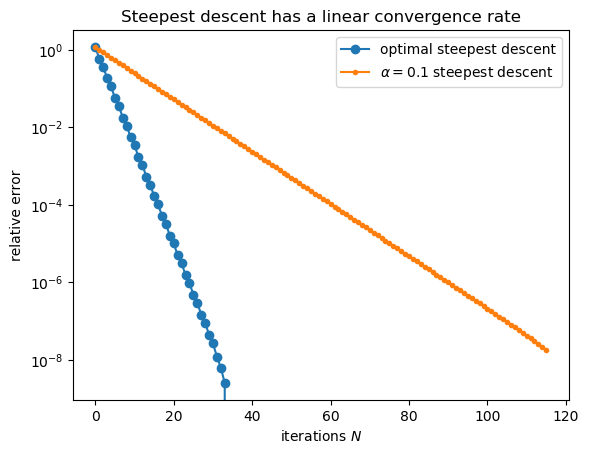

PyObject Text(0.5, 1.0, 'Steepest descent has a linear convergence rate')

In [14]:
# rate of convergence plot
figure()

errors = sqrt.(sum(abs2.(x_k_steepest .- x_k_steepest[:,end]), dims=1))./sum(abs2.(x_k_steepest[:,end]))
errors_const = sqrt.(sum(abs2.(x_k_steepest_const .- x_k_steepest[:,end]), dims=1))./sum(abs2.(x_k_steepest[:,end]))

semilogy(errors[1,:], "o-", label="optimal steepest descent")
semilogy(errors_const[1,:], ".-", label=L"$\alpha=0.1$ steepest descent")

legend()
xlabel(L"iterations $N$")
ylabel("relative error")
title("Steepest descent has a linear convergence rate")

#### (c) Comparing with Newton's method

In [15]:
function newton_descent_quad(Q, b, x0; ϵ=1e-8, N=1000)
    """ Applies Newton's method to the minimization condition
    ∇f = 0 for the quadratic problem
    min_x  1/2 x^T Q x = b^T x.
    """
    xs = [x0]
    
    grad_f(x) = Q*x - b
    
    x = x0
    for i=1:N
        ∇f = grad_f(x)
        
        # Newton step
        x = x .- Q \ ∇f
        
        push!(xs, x)
        if norm(x - xs[end-1]) <= ϵ*norm(xs[end-1])
            break
        end
    end
        
    return hcat(xs...)
end

newton_descent_quad (generic function with 1 method)

Trying a few initial conditions.

In [16]:
x_k_newton_1 = newton_descent_quad(Q, b, [-4.0, -3.0])

2×3 Array{Float64,2}:
 -4.0  1.5  1.5
 -3.0  2.0  2.0

In [17]:
x_k_newton_2 = newton_descent_quad(Q, b, [-10.0, -1.0])

2×3 Array{Float64,2}:
 -10.0  1.5  1.5
  -1.0  2.0  2.0

In [18]:
x_k_newton_3 = newton_descent_quad(Q, b, [15.0, 30.0])

2×3 Array{Float64,2}:
 15.0  1.5  1.5
 30.0  2.0  2.0

In [19]:
x_k_newton_4 = newton_descent_quad(Q, b, [-π, exp(1)])

2×3 Array{Float64,2}:
 -3.14159  1.5  1.5
  2.71828  2.0  2.0

Newton's method always converges to the exact solution in just one step.
This can be explained by noting that the root finding problem is

$$
\nabla f = 0
$$

with $\nabla f = Q\mathbf{x} - \mathbf{b}$.
The Jacobian of this is $J = Q$, such that the Newton iteration becomes

\begin{align}
\mathbf{x}_{k+1}^{Newton} &= \mathbf{x}_{k}^{Newton} - J^{-1} \nabla f(\mathbf{x}_{k}^{Newton}) \\
    &= \mathbf{x}_{k}^{Newton} - Q^{-1} \left( Q \mathbf{x}_{k}^{Newton} - \mathbf{b} \right) \\
    &= Q^{-1}\mathbf{b},
\end{align}
independent of $\mathbf{x}_k^{Newton}$.

But that is precisely the exact solution to

$$
\nabla f = 0 \Leftrightarrow  Q\mathbf{x} = \mathbf{b}.
$$